# Object Detection with Haar Cascade

Deteksi Objek menggunakan Haar feature-based cascade classifiers adalah metode deteksi objek yang diajukan pada tahun 2001 oleh Paul Viola dan Michael Jones dalam [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), kemudian pada tahun 2002 diteruskan oleh Rainer Lienhart dalam [paper](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

<br>

Haar Feature adalah fitur yang didasarkan pada Wavelet Haar. Wavelet Haar adalah gelombang tunggal bujur sangkar (satu interval tinggi dan satu interval rendah).
Untuk dua dimensi, satu terang dan satu gelap. Setiap Haar-like feature terdiri dari gabungan kotak-kotak hitam dan putih.

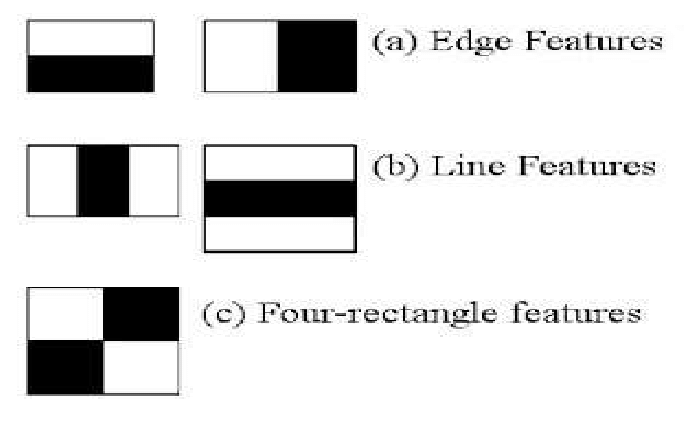

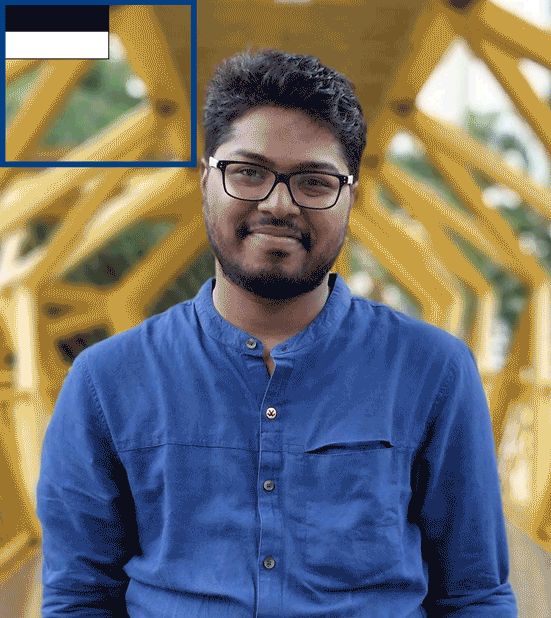

OpenCV menyediakan Cascade Classifier yang dapat diimplementasikan dengan menggunakan fungsi cv2.CascadeClassifier().

Jenis-jenis pre-trained model Cascade Classifier dapat ditemukan pada link github [berikut](https://github.com/opencv/opencv/tree/3.4/data).

Referensi tambahan :

1.   [Cascade Classifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)
2.   [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)




##1 Menyiapkan XML Pre-trained Haarcascade
XML merupakan ekstensi file model yang terbentuk setelah training model dilakukan. Pada latihan ini, kita akan menggunakan model pre-trained yang telah disediakan oleh OpenCV

####1.1 Download pre-trained model Haar Cascade dari Google Drive

In [ ]:
!gdown https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J

####1.2 Extract/Unzip file


In [ ]:
!unzip '/content/haarcascades.zip' -d '/content/model'

####1.3 Cek dan memastikan ketersediaan model


In [ ]:
!ls /content/model

##2 Menyiapkan Gambar Bahan Percobaan
Sebelumnya, kita perlu men-download gambar agar dapat digunakan didalam google colaboratory.

In [ ]:
!wget --no-check-certificate \
    https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg \
    -O potrait.jpg

Kita akan bereksperimen dan mencoba model Haarcascade dengan gambar ini

In [ ]:
from IPython.display import Image
Image('potrait.jpg')

##3 Mengimpor library
Untuk menggunakan model Haarcascade, kita membutuhkan beberapa library berikut:
1.   **OpenCV** untuk image processing dan untuk load cascade classifier
3.   **Matplotlib dan pylab** untuk menampilkan gambar dan grafik


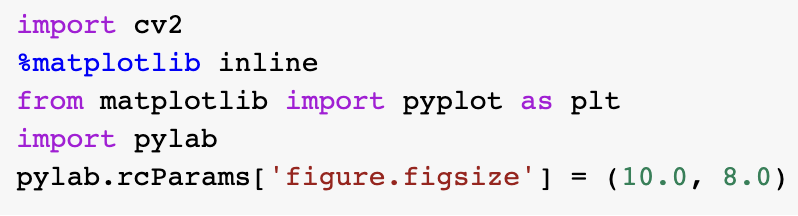

In [ ]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

##4 Load Image
Untuk mengimplementasikan model pada gambar, sebelumnya kita perlu me-load gambar pada base opencv. Disini segala pemrosesan image dapat dilakukan menggunkan function yang disediakan opencv.

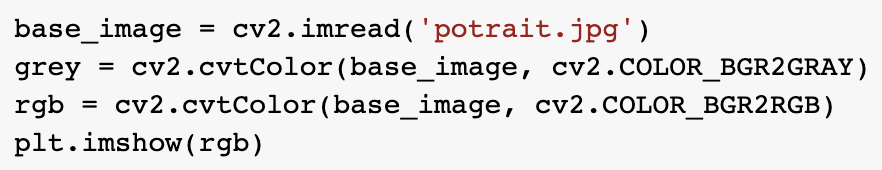

In [ ]:
base_image = cv2.imread('potrait.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

##5 Implementasi Model
Setelah menyiapkan pre-trained model file, library dan image yang akan digunakan. Maka kita dapat mulai mengimplementasikannya :)

####5.1 Face Detection
Face detection menggunakan pre-trained model haarcascade_frontalface_default.xml untuk mendeteksi wajah pada gambar

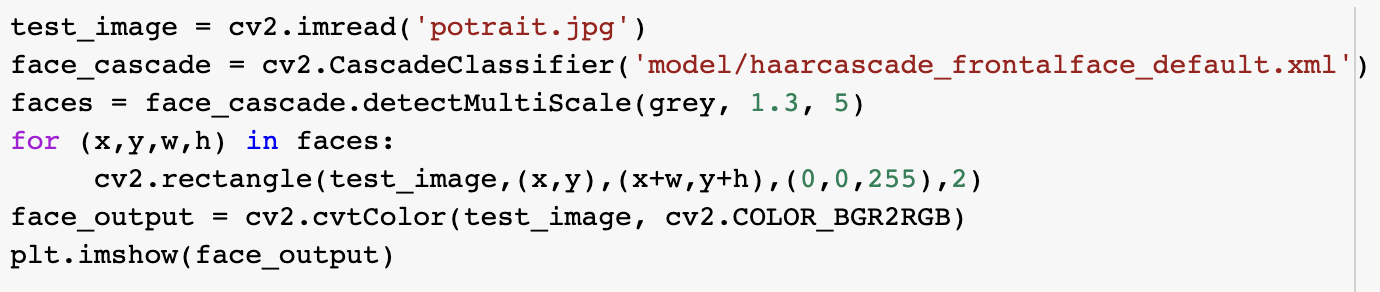

In [ ]:
test_image = cv2.imread('potrait.jpg')
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3,5)
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2)
face_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_output)

####5.2 Smile Detection
Smile detection menggunakan pre-trained model haarcascade_smile.xml untuk mendeteksi senyum pada gambar.

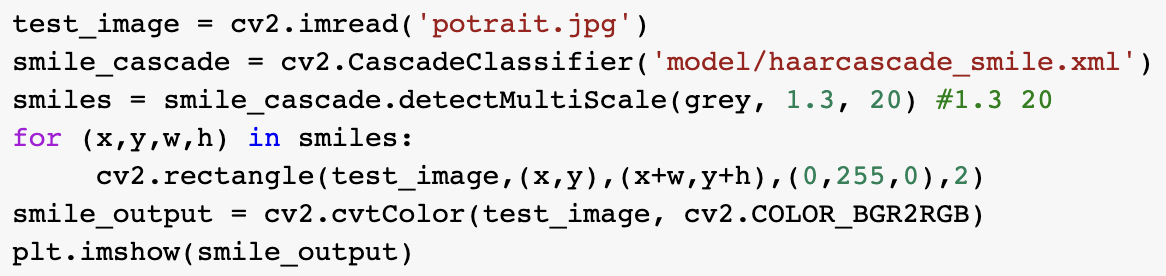

In [ ]:
test_image = cv2.imread('potrait.jpg')
smile_cascade = cv2.CascadeClassifier('model/haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20) #31.3 20
for (x,y,w,h) in smiles:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)

Pada gambar di atas terdapat False Positive, Untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan smile detection

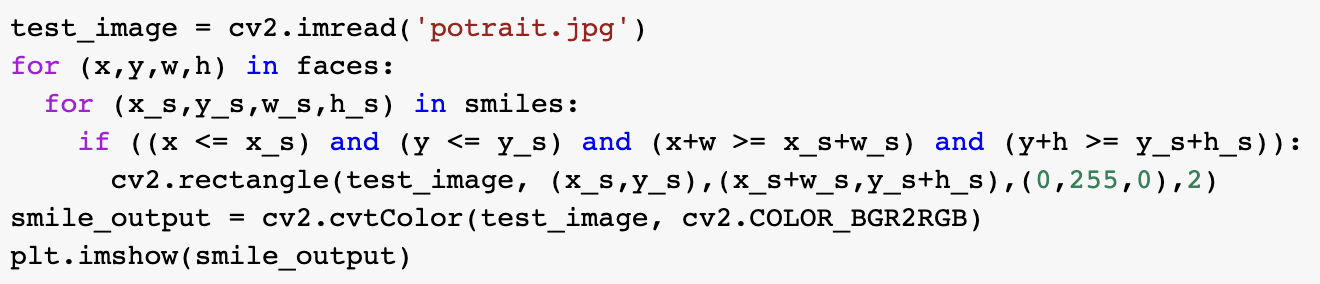

In [ ]:
test_image = cv2.imread('potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s, w_s, h_s) in smiles:
    if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)

####5.3 Eye Detection
Eye Detection menggunakan pre-trained model haarcascade_eye.xml untuk mendeteksi mata pada gambar.

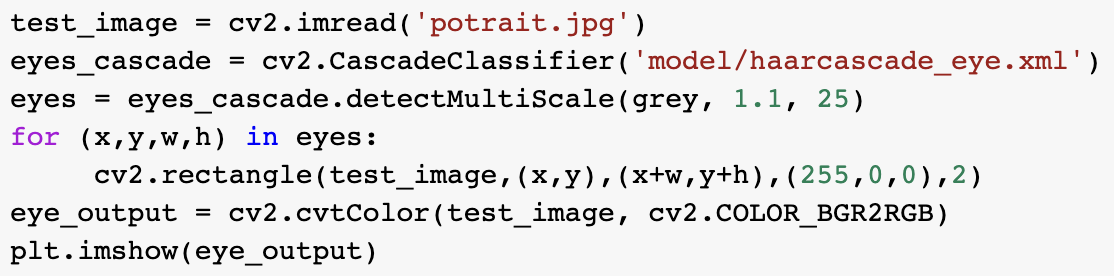

In [ ]:
test_image = cv2.imread('potrait.jpg')
eyes_cascade = cv2.CascadeClassifier('model/haarcascade_eye.xml')
eyes = eyes_cascade.detectMultiScale(grey, 1.1, 25)
for (x,y,w,h) in eyes:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
eye_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(eye_output)

Apabila terdapat False Positive, untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan eye detection

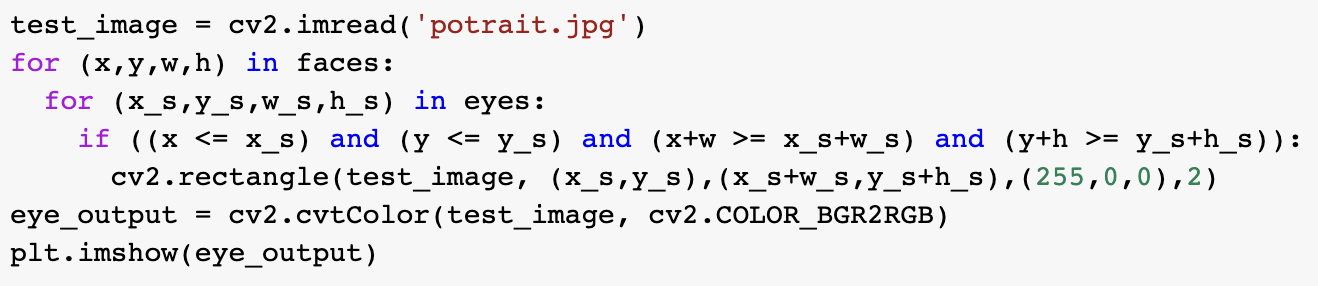

In [ ]:
test_image = cv2.imread('potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s, w_s, h_s) in eyes:
    if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
       cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,0,0),2)
eye_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(eye_output)

####5.4 Kombinasi Beberapa Model
Kita bisa mengkombinasikan lebih dari satu model untuk meningkatkan keakuratan pendeteksian object yang kita inginkan

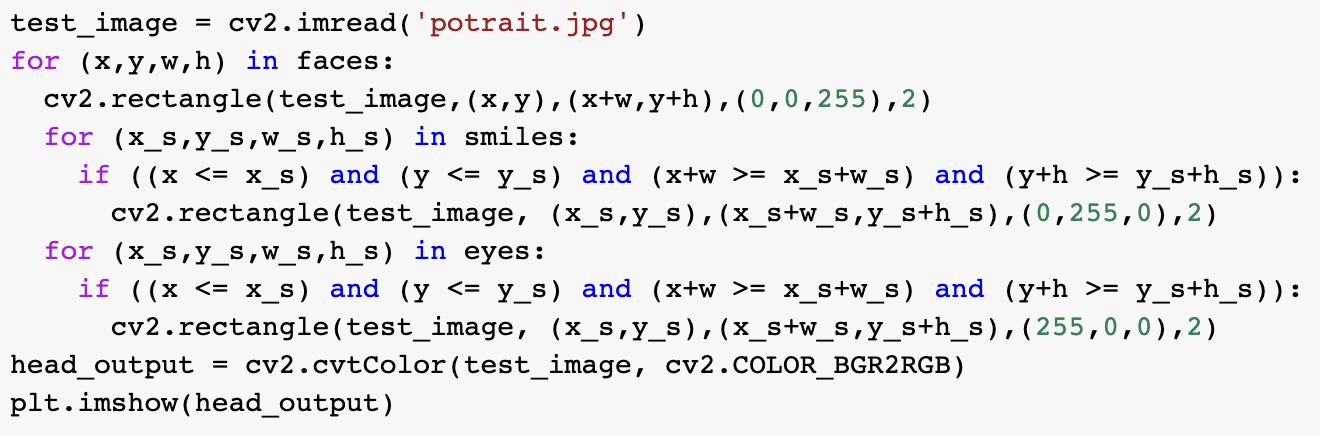

In [ ]:
test_image = cv2.imread('potrait.jpg')
for (x,y,w,h) in faces:
   cv2.rectangle(test_image,(x,y),(x+w,y+h), (0,0,255),2)
   for (x_s,y_s, w_s, h_s) in smiles:
     if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
       cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
for (x_s,y_s,w_s,h_s) in eyes:
  if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
     cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,0,0),2)
head_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(head_output)

# Latihan

### No.1 : Face Detection

Download gambar dari link di bawah ini menggunakan wget.

https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg

Buatlah deteksi wajah dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi semua wajah dari gambar tersebut
<br>

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'Pelantikan-Sisa-Kabinet-19-Agt-2024.png'
test_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade models for face, smile, and eyes
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Detect smiles within each face
    roi_gray = gray_image[y:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22, minSize=(25, 25))

    for (x_s, y_s, w_s, h_s) in smiles:
        cv2.rectangle(test_image, (x + x_s, y + y_s), (x + x_s + w_s, y + y_s + h_s), (0, 255, 0), 2)

    # Detect eyes within each face
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(20, 20))

    for (x_s, y_s, w_s, h_s) in eyes:
        cv2.rectangle(test_image, (x + x_s, y + y_s), (x + x_s + w_s, y + y_s + h_s), (255, 0, 0), 2)

# Convert BGR image to RGB for display
output_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Display the output
plt.imshow(output_image)
plt.axis('off')
plt.show()


### No.2 : Plate Number Detection

Download gambar dari link di bawah ini menggunakan wget.

https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg

Buatlah deteksi plat nomor mobil dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi plat nomor dari 3 mobil terdepan

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'russia-cars.jpg'
test_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade model for license plates
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# Detect license plates in the image
plates = plate_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

# Sort detected plates by size (width * height) and select the three largest plates
sorted_plates = sorted(plates, key=lambda x: x[2] * x[3], reverse=True)[:3]

# Draw rectangles around the detected license plates
for (x, y, w, h) in sorted_plates:
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

# Convert BGR image to RGB for display
output_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Display the output
plt.imshow(output_image)
plt.axis('off')
plt.show()